# Análisis exploratorio de datos

## Dependencias

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


## Productos a enviar

In [31]:
coded_deliveries = pd.read_csv('data/processed/deliveries-by-address-with-coords.csv')
latest_deliveries = pd.read_csv('data/processed/latest-deliveries.csv')
products = pd.read_csv('data/processed/products.csv')


Dado lo relativamente costoso que puede ser el procesar todos los datos de nuevo, podemos aprovechar los datos ya procesados y hacer uso de pandas para obtener solamente la información que necesitamos.

In [45]:
deliveries = pd.merge(coded_deliveries, latest_deliveries, on='full_address')
products.columns = products.columns.str.replace('Codigo', 'codigo')
deliveries = pd.merge(deliveries, products, on='codigo') 


In [46]:
deliveries.columns


Index(['full_address', 'Vol_x', 'locations', 'point', 'latitude', 'longitude',
       'altitude', 'unidad', 'factura', 'foliocontrol', 'tienda', 'fechaventa',
       'fechaenrutada', 'ruta', 'codigo', 'cantidad', 'preciovta',
       'tipodeservicio', 'cedis', 'num_ciudad', 'nombreciudad', 'numerozona',
       'nombrezona', 'nombrecalle', 'numerodecasa', 'departamento',
       'num_codigopostal', 'DCF', 'CATEGORIAS', 'Articulo', 'Marca', 'Modelo',
       '# Proveedor', 'Vol_y'],
      dtype='object')

In [47]:
vals = deliveries.CATEGORIAS.value_counts()


In [49]:
vals


HOGAR                                      83
RECAMARA                                   67
LÍNEA BLANCA                               51
TECNOLOGIA Y ENTRETENIMIENTO               17
CELULARES                                  16
JUGUETES, BEBÉS Y APARATOS DE EJERCICIO     9
ENSERES DOMÉSTICOS                          9
JOYERÍA Y RELOJERÍA                         4
TRANSPORTE Y MOVILIDAD                      2
Name: CATEGORIAS, dtype: int64

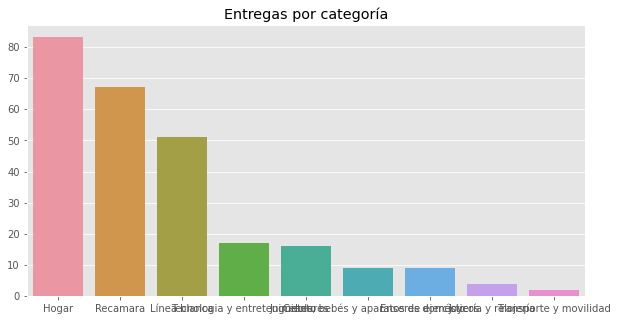

In [60]:
# Plot the deliveries by category
plt.figure(figsize=(10,5))
ax = sns.barplot(x=vals.index.str.capitalize(), y=vals.values)
plt.title('Entregas por categoría');
